In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set paths
input_base_dir = '2_Emoji_Dataset'
output_base_dir = '3_Emoji_Dataset'

# Ensure the output directory exists
if not os.path.exists(output_base_dir):
    os.makedirs(output_base_dir)

# Define the ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode='nearest'
)

# Process each class folder
for class_folder in os.listdir(input_base_dir):
    class_folder_path = os.path.join(input_base_dir, class_folder)
    output_class_folder = os.path.join(output_base_dir, class_folder)
    
    if not os.path.exists(output_class_folder):
        os.makedirs(output_class_folder)

    if os.path.isdir(class_folder_path):
        # Process images in each class folder
        for filename in os.listdir(class_folder_path):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(class_folder_path, filename)
                img = tf.keras.preprocessing.image.load_img(img_path)
                img_array = tf.keras.preprocessing.image.img_to_array(img)
                img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

                # Create a generator for this image
                generator = datagen.flow(img_array, batch_size=1, save_to_dir=output_class_folder, save_prefix='aug', save_format='jpeg')

                # Generate augmented images
                num_augmented_images_per_image = 100  # Number of augmented images per original image
                for _ in range(num_augmented_images_per_image):
                    next(generator)  # Generate and save one batch of augmented images


In [5]:
#Defining prameters.
# Parameters
img_size = (300, 300)
batch_size = 32
data_dir = '3_Emoji_Dataset'  # path to dataset
dir_list = os.listdir(data_dir)

In [6]:
images = []
class_number = []


In [7]:
for x, folder in enumerate(dir_list):
    image_list = os.listdir(data_dir + "/" + str(folder))
    for _, img in enumerate(image_list):
        current_img = cv2.imread(data_dir + "/" + str(folder) + "/" + img)
        try:
           current_img = cv2.resize(current_img, (28,28))  #resize
        except:
           break
        images.append(current_img)
        class_number.append(x)
    print(folder)
print(len(images))

images = np.array(images)
class_number = np.array(class_number)

print(images.shape)
print(class_number.shape)

checkmark
cloud
croissant
heart
laugh
smile
sun
27751
(27751, 28, 28, 3)
(27751,)


In [8]:
print(images)

[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255

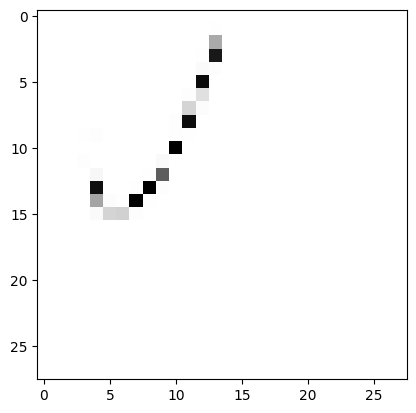

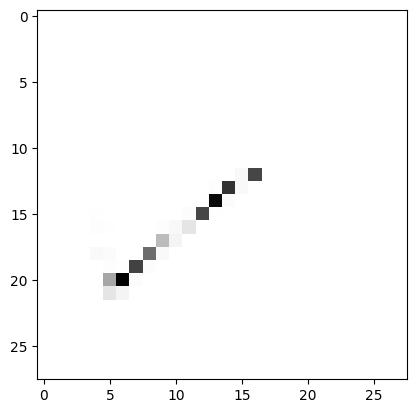

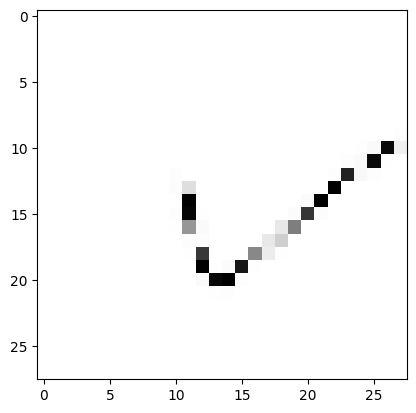

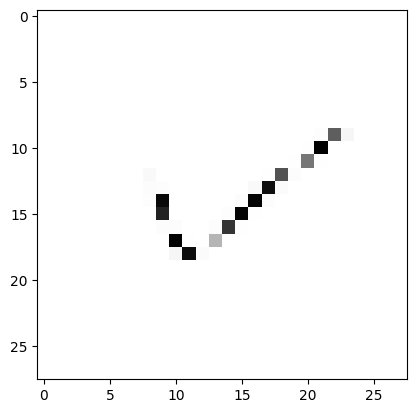

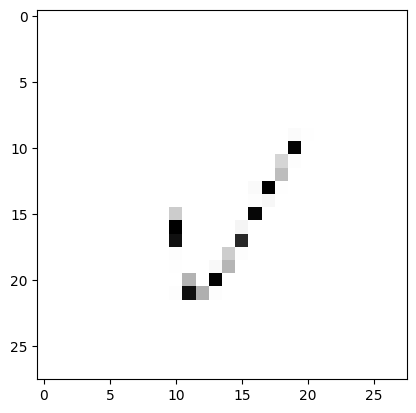

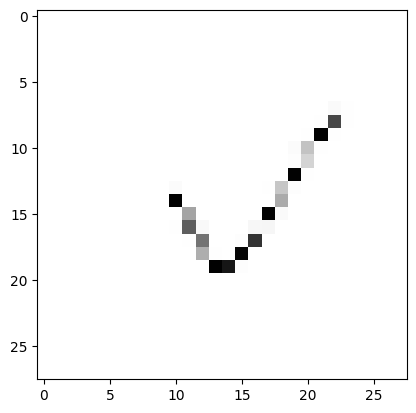

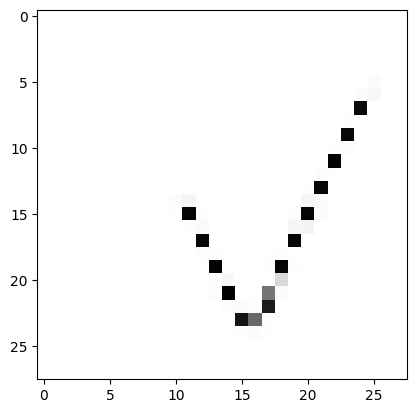

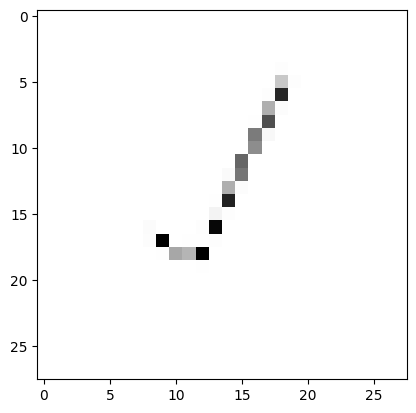

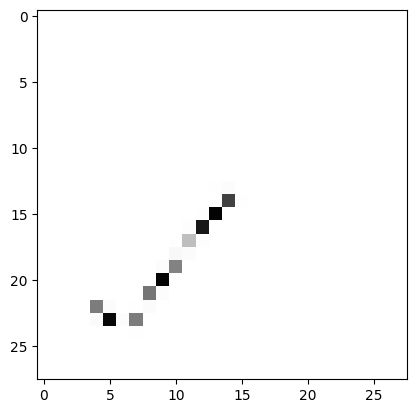

In [9]:
for i in range (0,9):
 plt.imshow(images[i])
 plt.show()

In [10]:
print(class_number)

[0 0 0 ... 6 6 6]


In [11]:

"""
Split Data for training, testing, and validation.
"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, class_number, test_size = 0.1)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.1)
print(X_train.shape)
print(X_test.shape)

number_of_samples = []
number_of_classes=7
for idx in range(number_of_classes):
    number_of_samples.append(len(np.where(y_train == idx)[0]))

print(number_of_samples)

(22477, 28, 28, 3)
(2776, 28, 28, 3)
[3106, 3221, 3189, 3239, 3286, 3246, 3190]


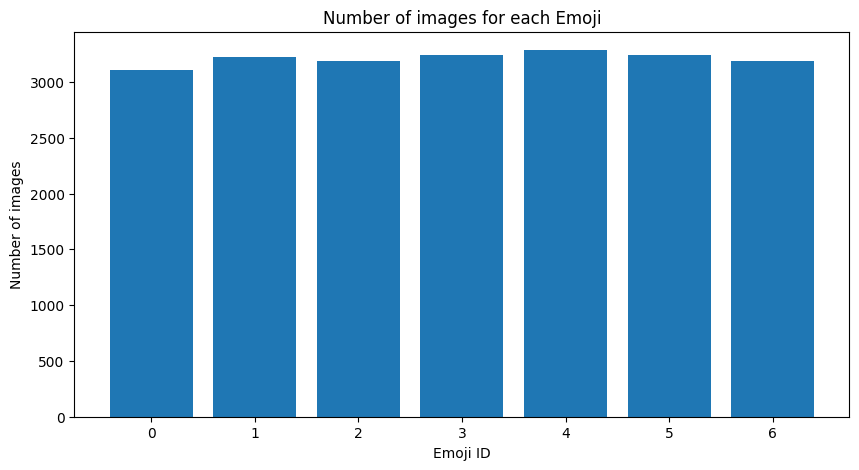

In [12]:
 plt.figure(figsize = (10, 5))
 plt.bar(range(number_of_classes), number_of_samples)
 plt.title("Number of images for each Emoji")
 plt.xlabel("Emoji ID")
 plt.ylabel("Number of images")
 plt.show()


In [13]:
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

(22477, 28, 28, 3)
(2776, 28, 28, 3)
(2498, 28, 28, 3)


In [14]:
def pre_process(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    #convert rgb to gray
    #img=cv2.bitwise_not(img)    #black_background
    # img = cv2.equalizeHist(img)
    _,img = cv2.threshold(img, 5, 255, cv2.THRESH_BINARY_INV) #we don't need the threshold value, you use _ to ignore it
    return img/255

X_train = np.array(list(map(pre_process, X_train)))
X_test = np.array(list(map(pre_process, X_test)))
X_validation = np.array(list(map(pre_process, X_validation)))

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)

data_generator = ImageDataGenerator(width_shift_range = 0.1,
                                    height_shift_range = 0.1,
                                    zoom_range = 0.2,
                                    shear_range = 0.1,
                                    rotation_range = 5)

data_generator.fit(X_train)

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, number_of_classes) #To convert to vectors loke One hot Encoding.
y_test = to_categorical(y_test, number_of_classes)
y_validation = to_categorical(y_validation, number_of_classes)

In [15]:
X_train.shape #Converted to 1 chanel.

(22477, 28, 28, 1)

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout, Flatten, Dense
from keras.layers import Conv2D, MaxPooling2D
img_dim=28
def create_model():
    number_of_filters = 30  #80
    size_of_filter1 = (3, 3)
    size_of_filter2 = (3, 3)
    size_of_pool = (2, 2)
    number_of_nodes = 100
    number_of_classes=7
    img_dim=28

    model = models.Sequential()
    model.add(Conv2D(number_of_filters, size_of_filter1, input_shape = (img_dim, img_dim, 1), activation = "relu"))
    model.add(Conv2D(number_of_filters, size_of_filter1, activation = "relu"))
    model.add(MaxPooling2D(pool_size = size_of_pool))
    model.add(Dropout(0.2))
    model.add(Conv2D(number_of_filters // 2, size_of_filter2, activation = "relu"))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(number_of_nodes, activation = "relu"))
    model.add(Dropout(0.3))
    model.add(Dense(24, activation = "relu"))
    model.add(Dense(number_of_classes, activation = "softmax"))
    model.compile(Adam(learning_rate = 0.008), loss = "categorical_crossentropy", metrics = ["accuracy"])
    return model

model = create_model()
print(model.summary())
     

C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 30)          │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 30)          │           8,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12, 12, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 10, 10, 15)          │           4,065 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 10, 10, 15)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │         150,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 24)                  │           2,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             175 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 165,194 (645.29 KB)

 Trainable params: 165,194 (645.29 KB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/20


C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 341ms/step - accuracy: 0.1438 - loss: 1.9513 - val_accuracy: 0.2234 - val_loss: 1.9196
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 299ms/step - accuracy: 0.2093 - loss: 1.8721 - val_accuracy: 0.3579 - val_loss: 1.5846
Epoch 3/20
23/45 ━━━━━━━━━━━━━━━━━━━━ 5s 248ms/step - accuracy: 0.3665 - loss: 1.6553

C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - accuracy: 0.3774 - loss: 1.6345 - val_accuracy: 0.4367 - val_loss: 1.4326
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 289ms/step - accuracy: 0.4201 - loss: 1.5041 - val_accuracy: 0.4944 - val_loss: 1.3002
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 302ms/step - accuracy: 0.4468 - loss: 1.4362 - val_accuracy: 0.5140 - val_loss: 1.2616
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - accuracy: 0.4572 - loss: 1.4229 - val_accuracy: 0.4880 - val_loss: 1.3317
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 288ms/step - accuracy: 0.4785 - loss: 1.3753 - val_accuracy: 0.5196 - val_loss: 1.2319
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 302ms/step - accuracy: 0.4720 - loss: 1.3725 - val_accuracy: 0.4956 - val_loss: 1.3200
Epoch 9/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - accuracy: 0.4847 - loss: 1.3731 - val_accuracy: 0.5052 - val_loss: 1.2916
Epoch 10/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 289ms/step - accuracy: 0.4872 - loss: 1.3620 - val_accuracy: 0.5240 

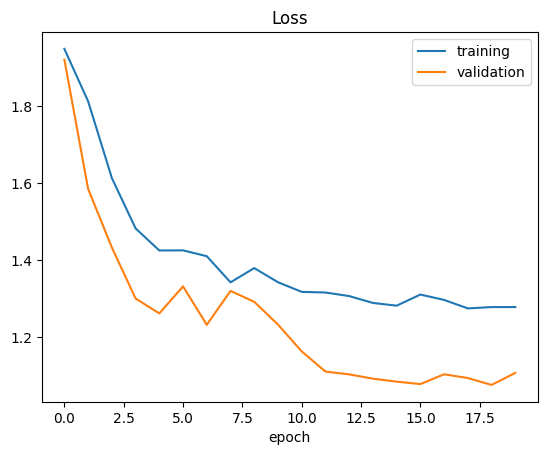

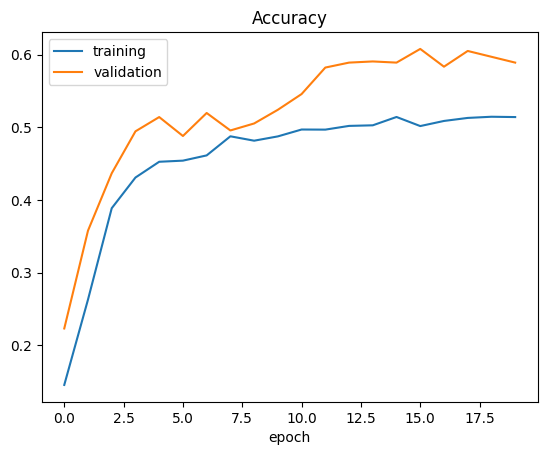

Test score:  1.125658631324768
Test accuracy:  0.5878962278366089


In [17]:
history = model.fit(data_generator.flow(X_train, y_train,
                                        batch_size = 200),
                                        steps_per_epoch = 45,
                                        epochs = 20,
                                        validation_data = (X_validation, y_validation))

plt.figure(1)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["training", "validation"])
plt.title("Loss")
plt.xlabel("epoch")

plt.figure(2)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["training", "validation"])
plt.title("Accuracy")
plt.xlabel("epoch")
plt.show()

score = model.evaluate(X_test, y_test, verbose = 0)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

In [18]:
#I can improve the performance by doing changes in the model, resize of the image, learning rate, adding different type of layers,etc.